In [10]:
# Import needed libraries
import librosa
import librosa.display
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import Audio, display

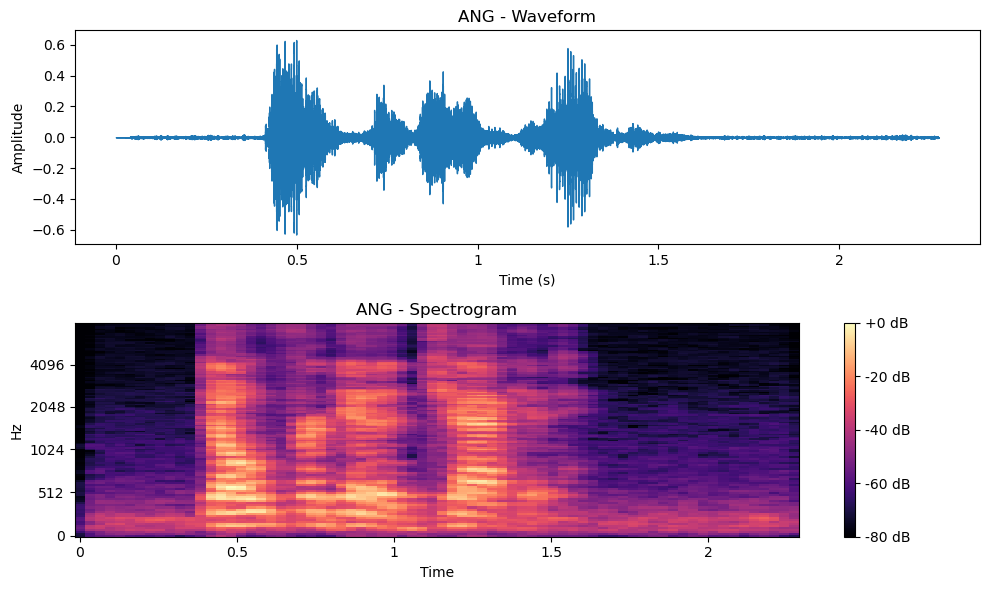

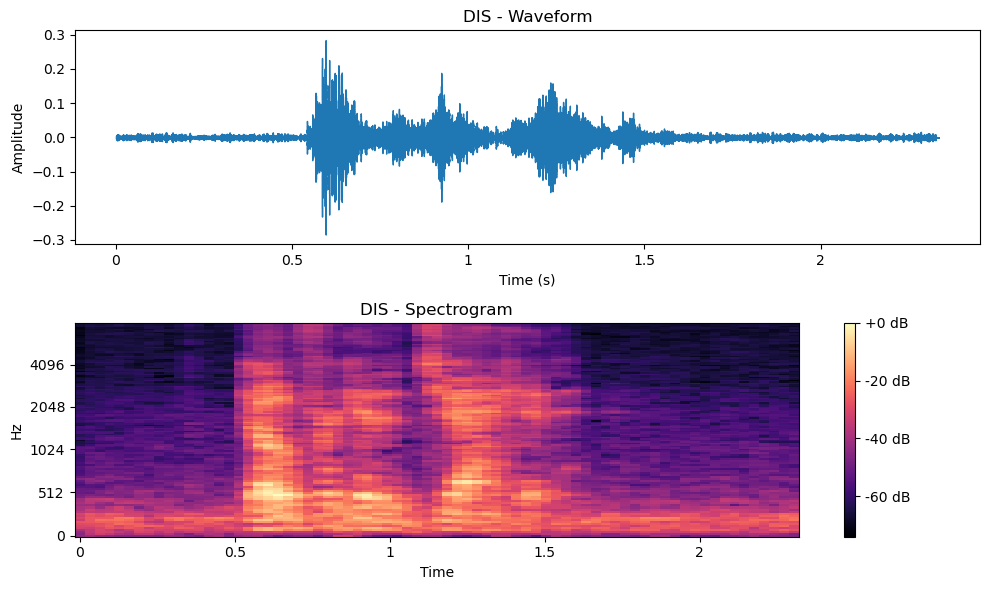

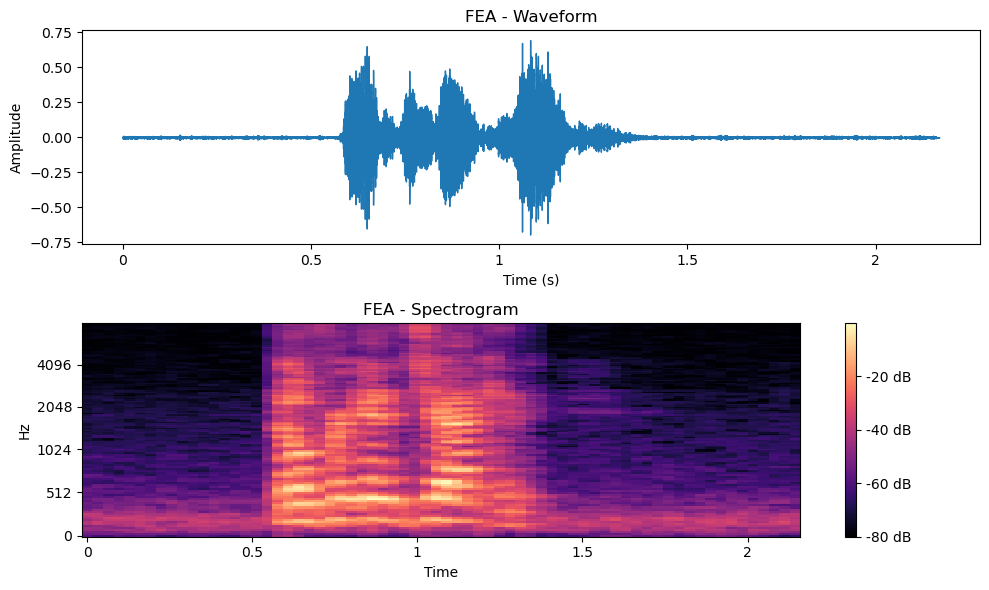

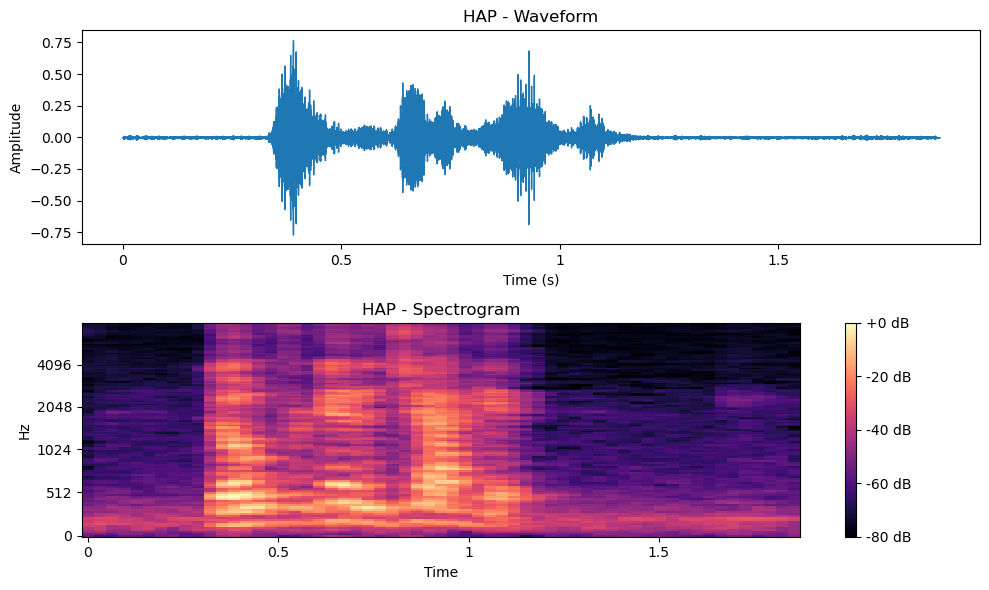

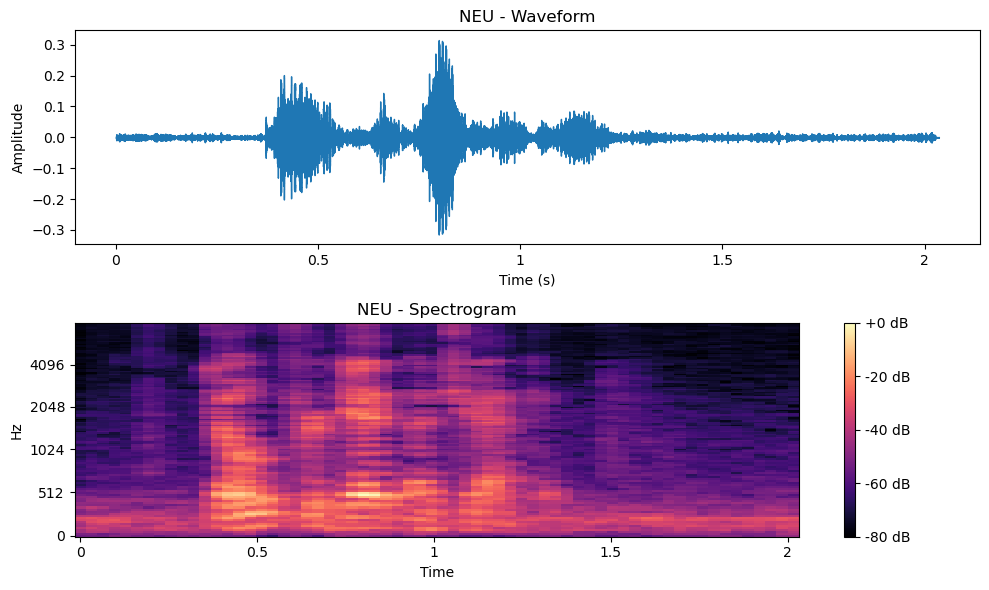

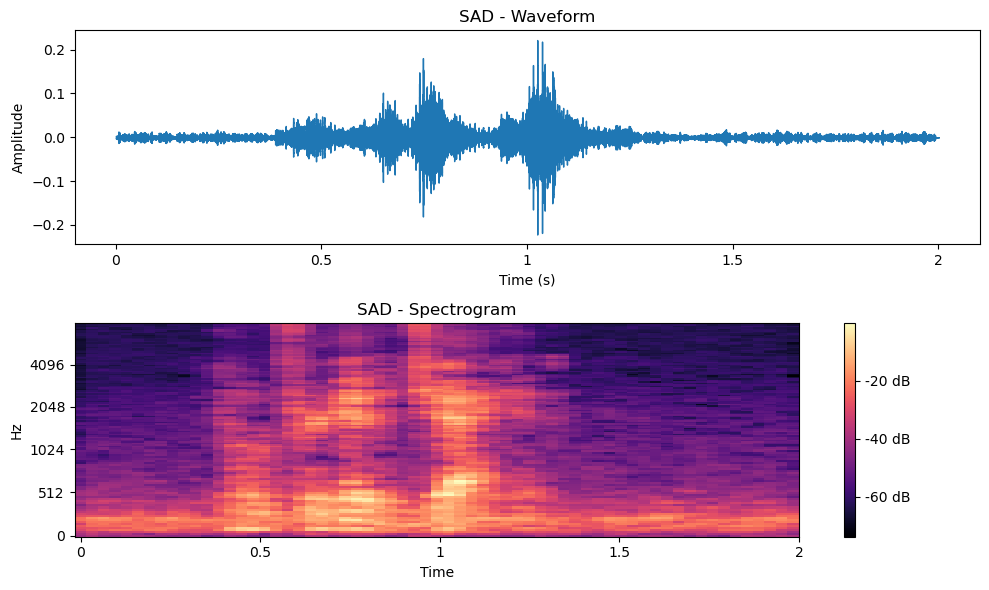

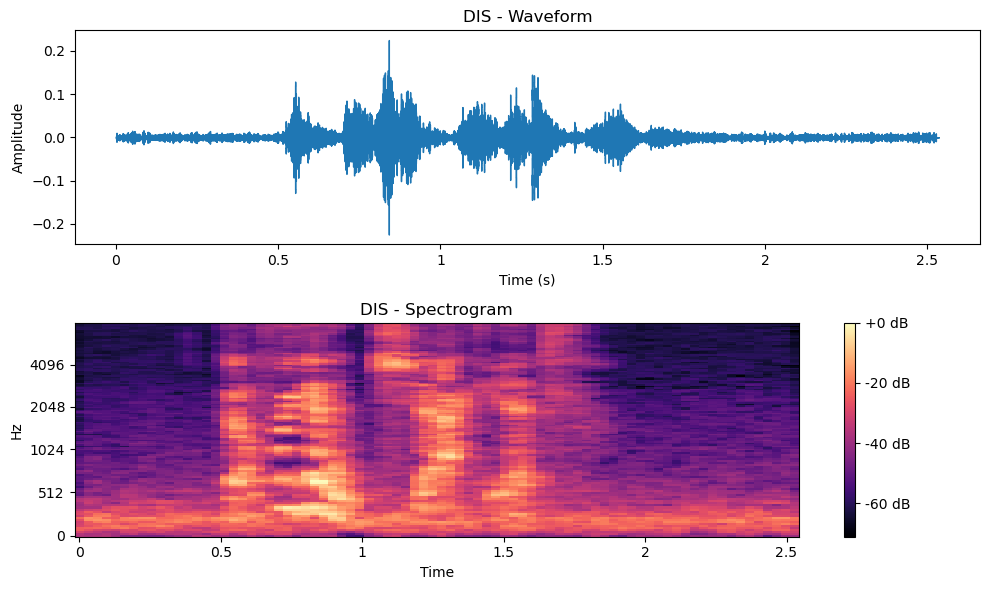

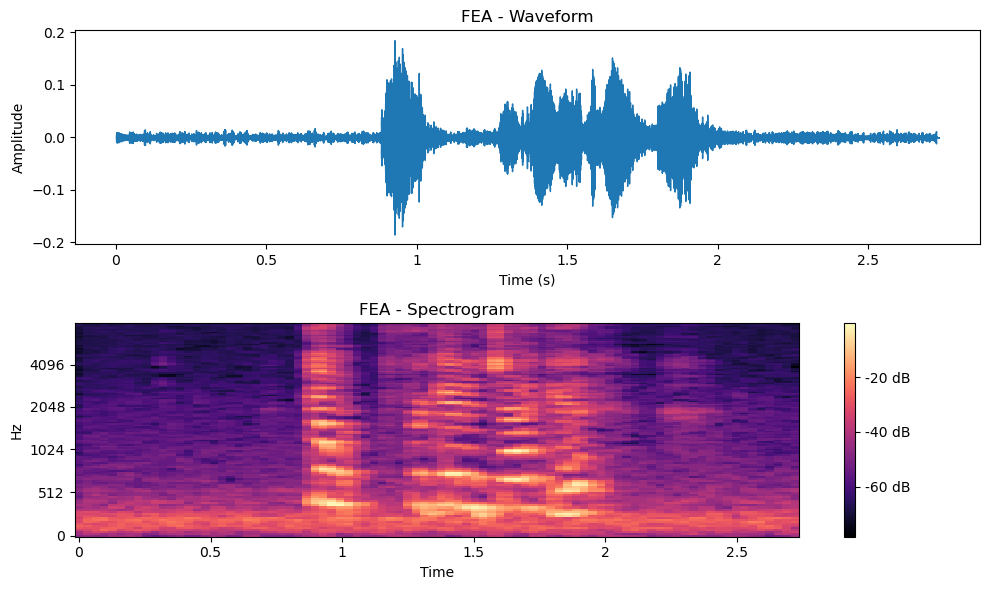

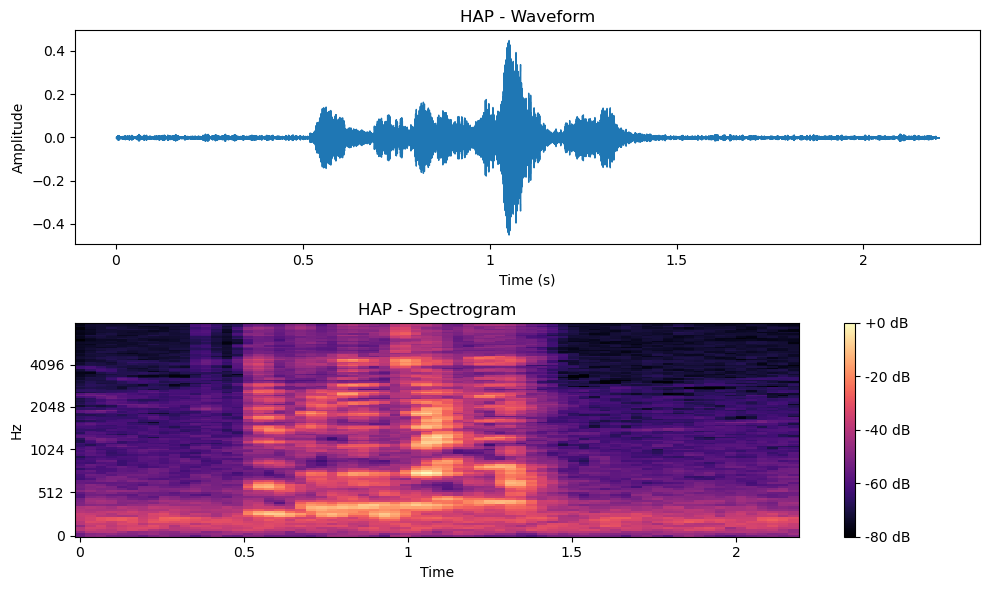

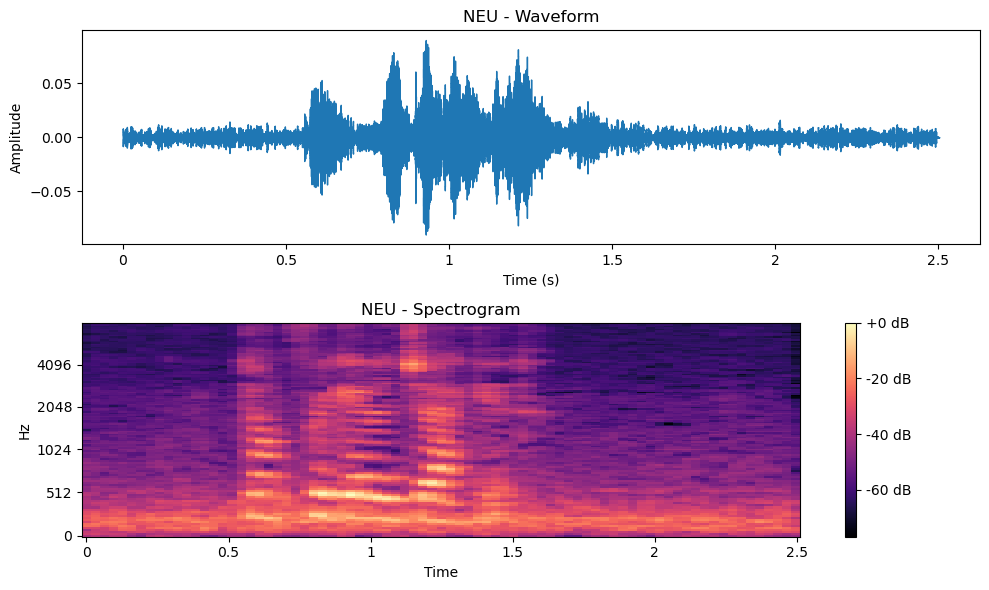

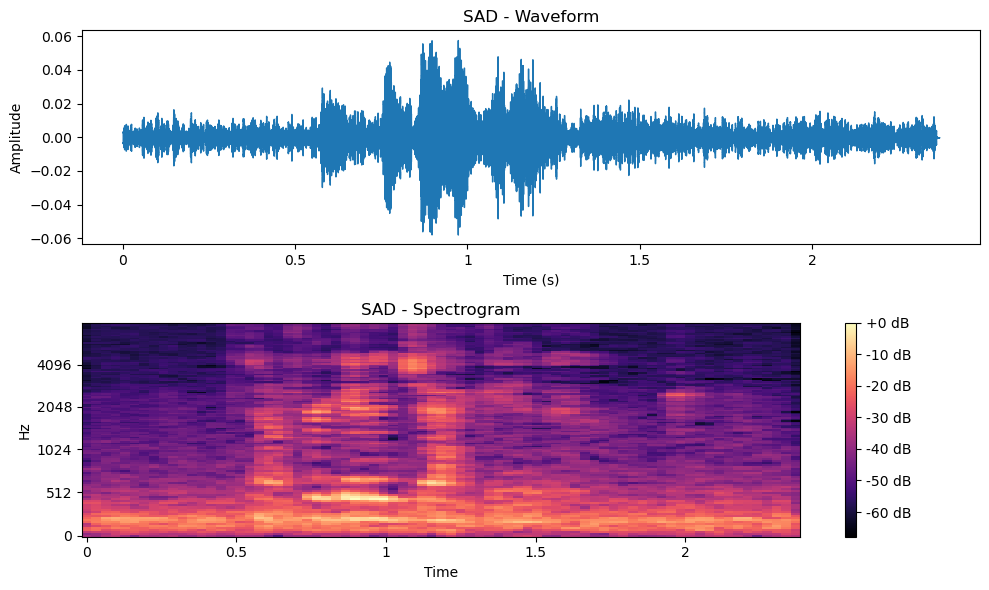

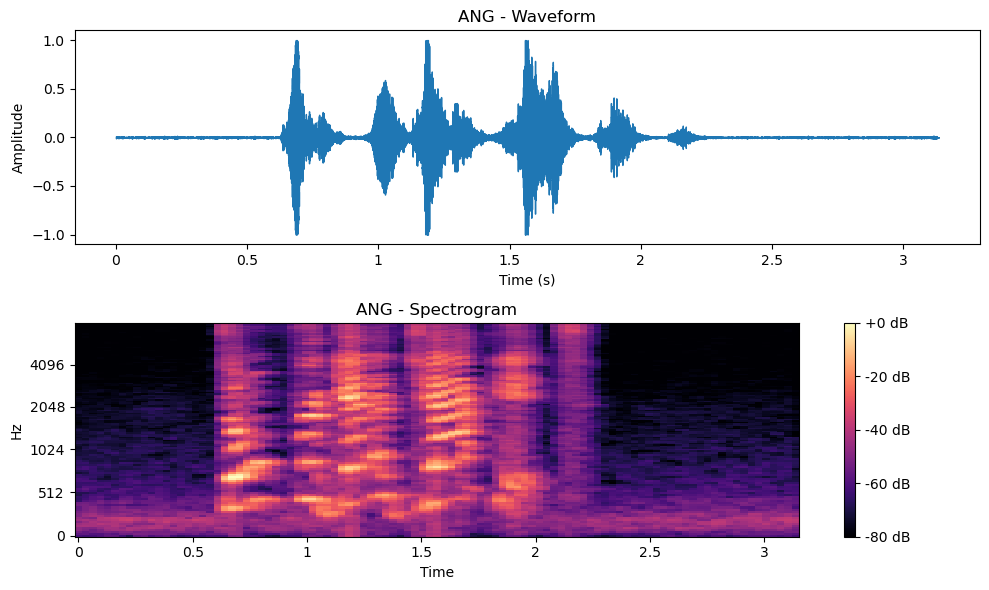

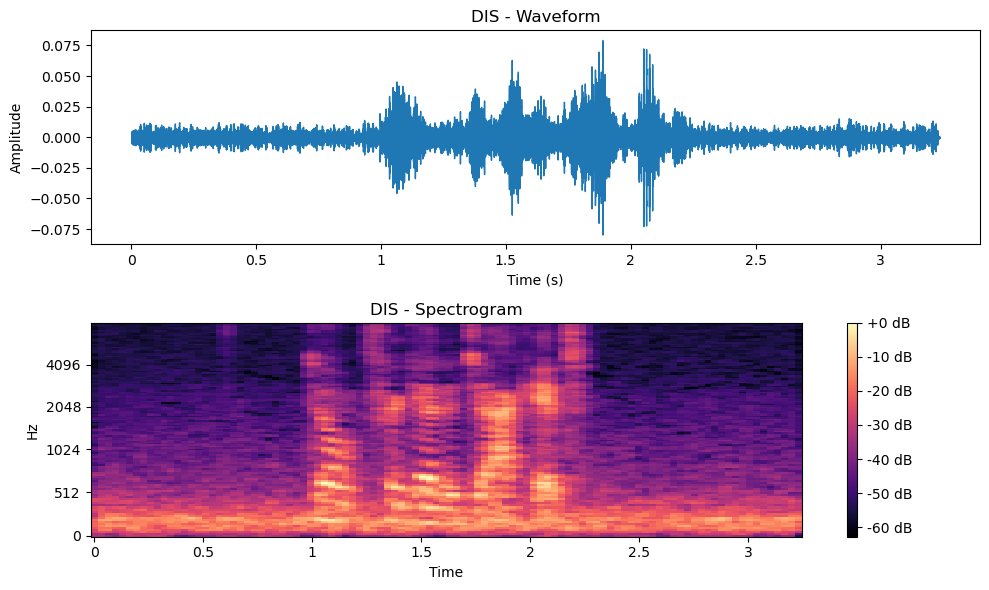

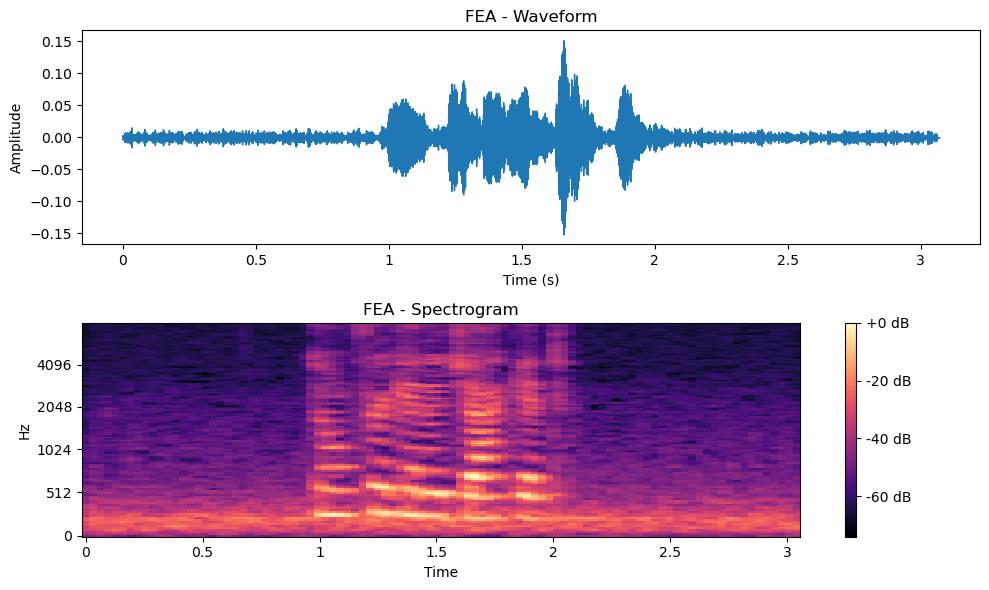

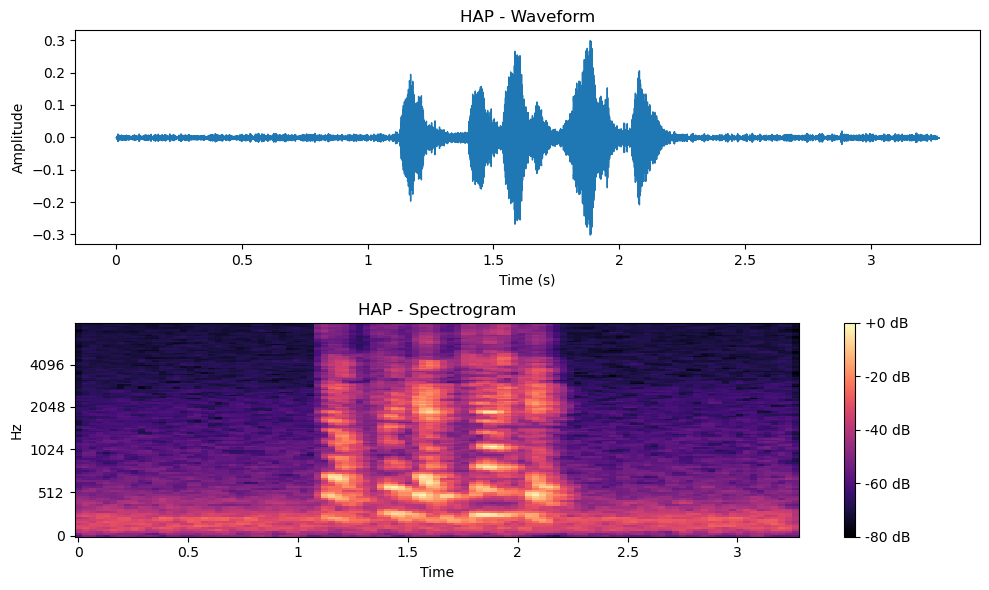

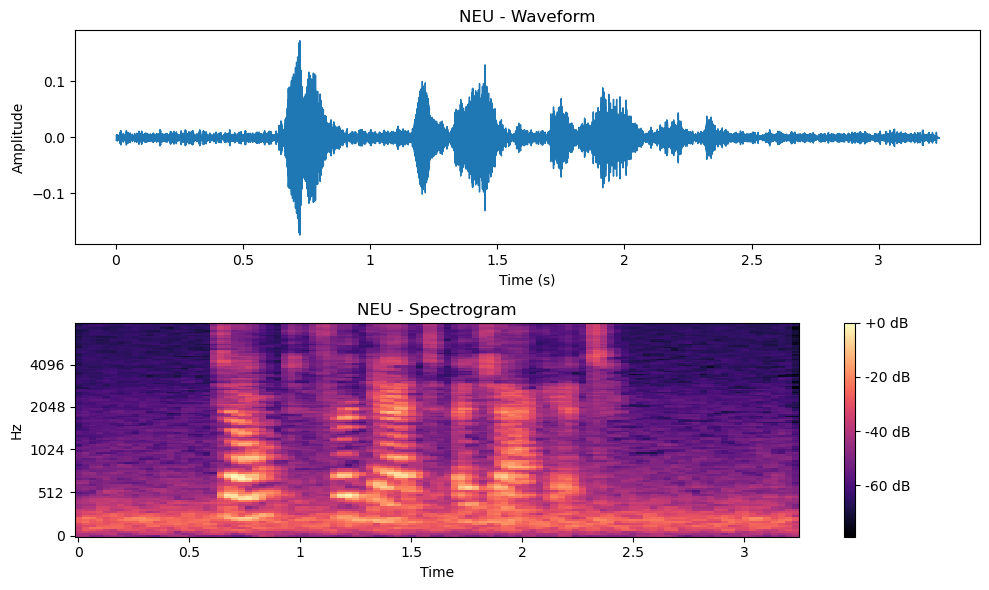

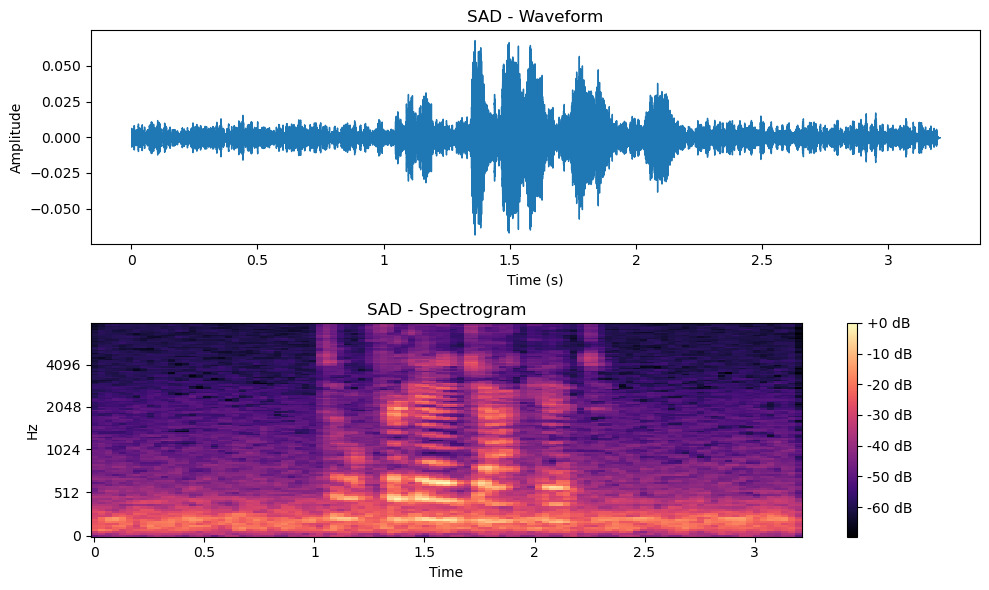

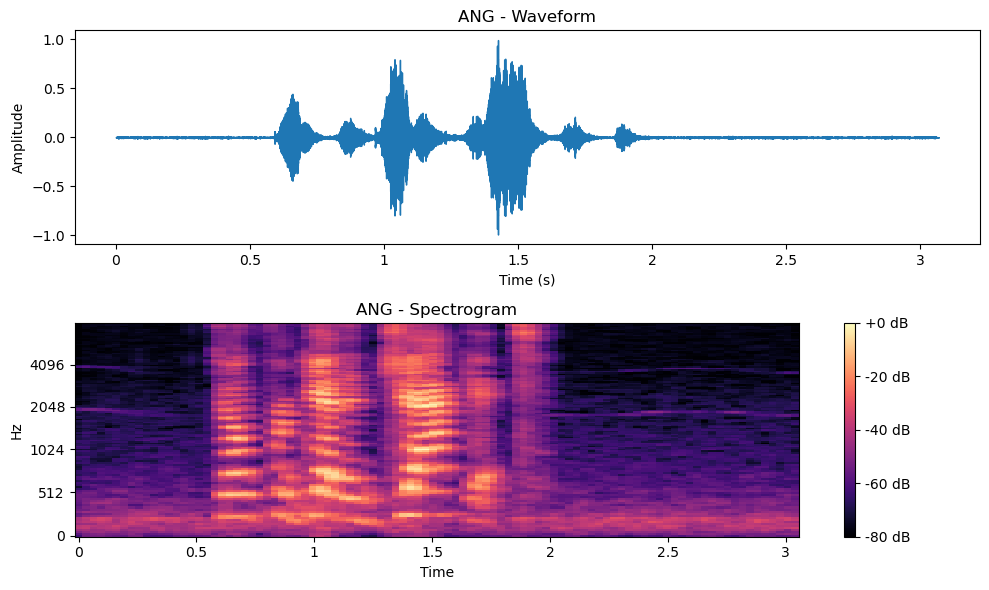

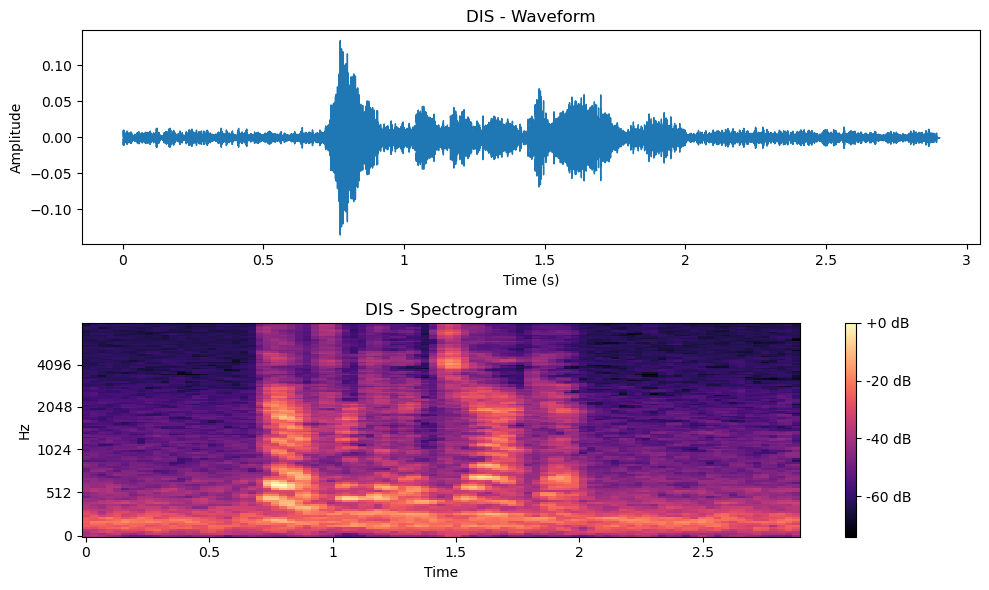

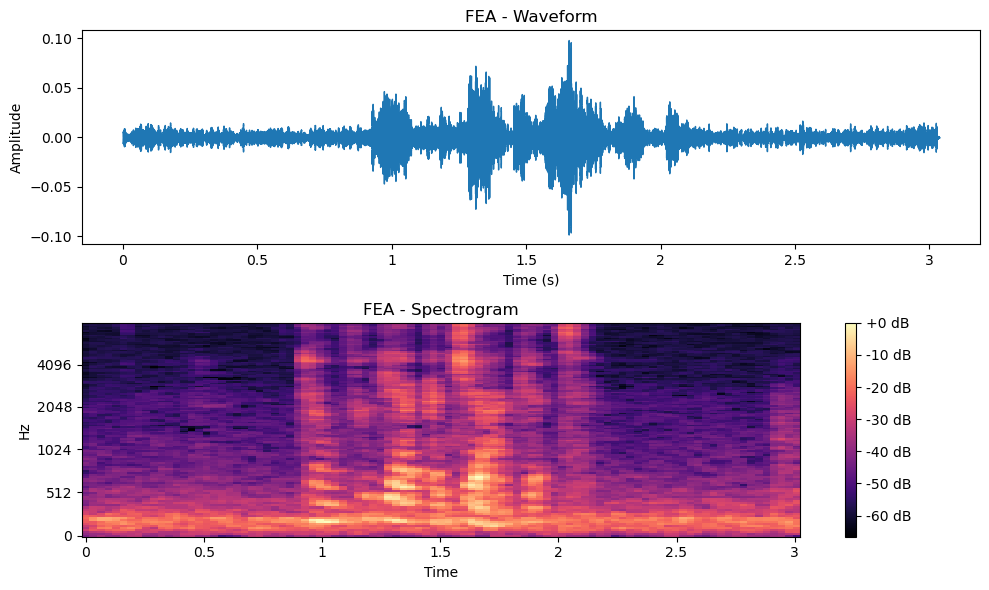

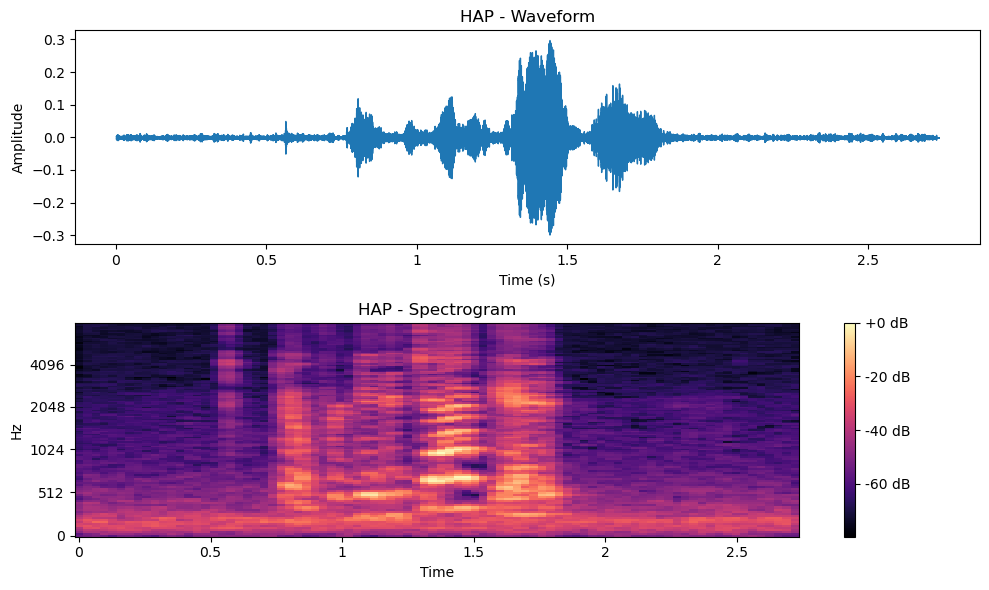

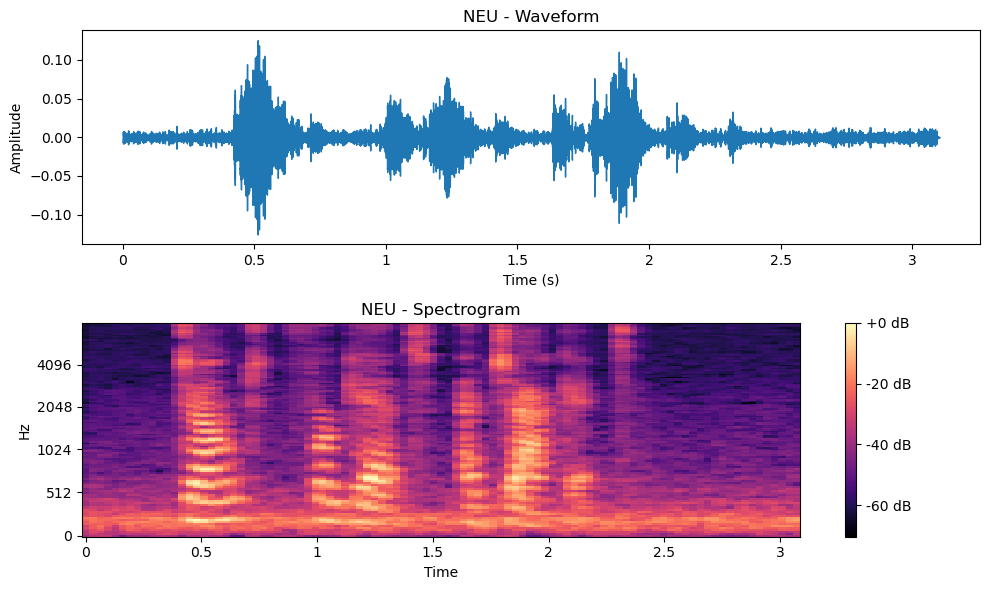

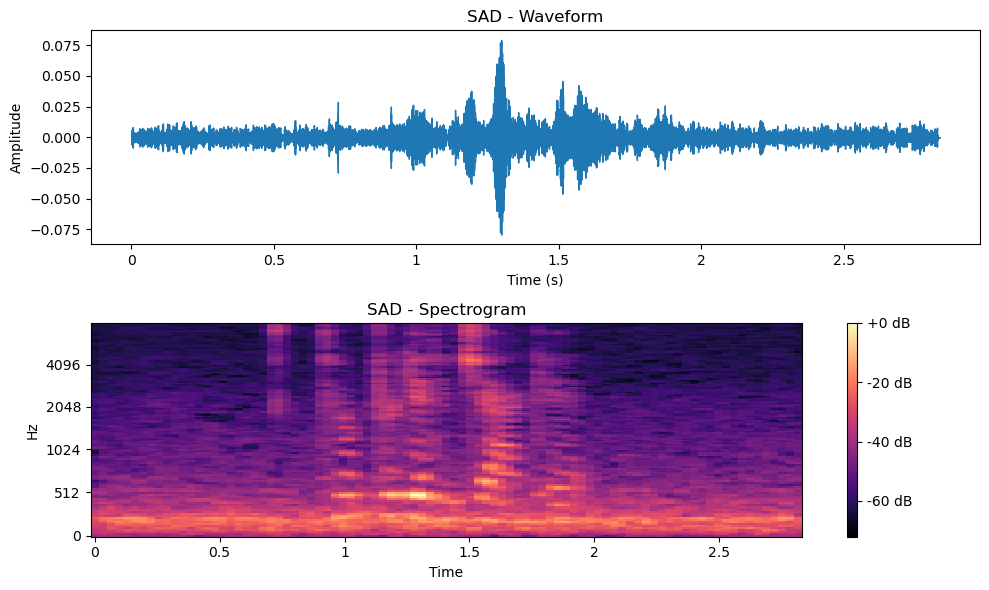

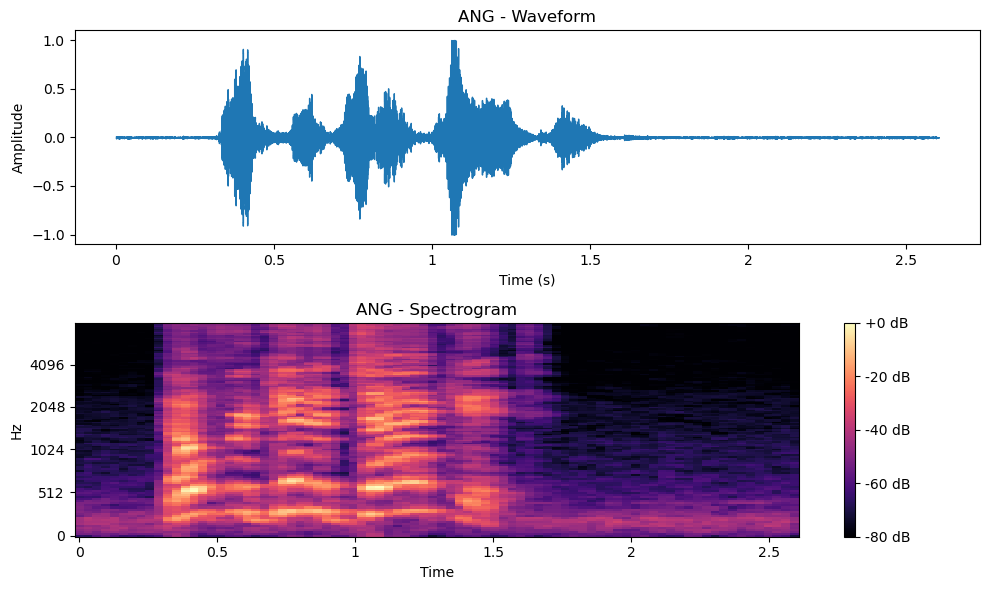

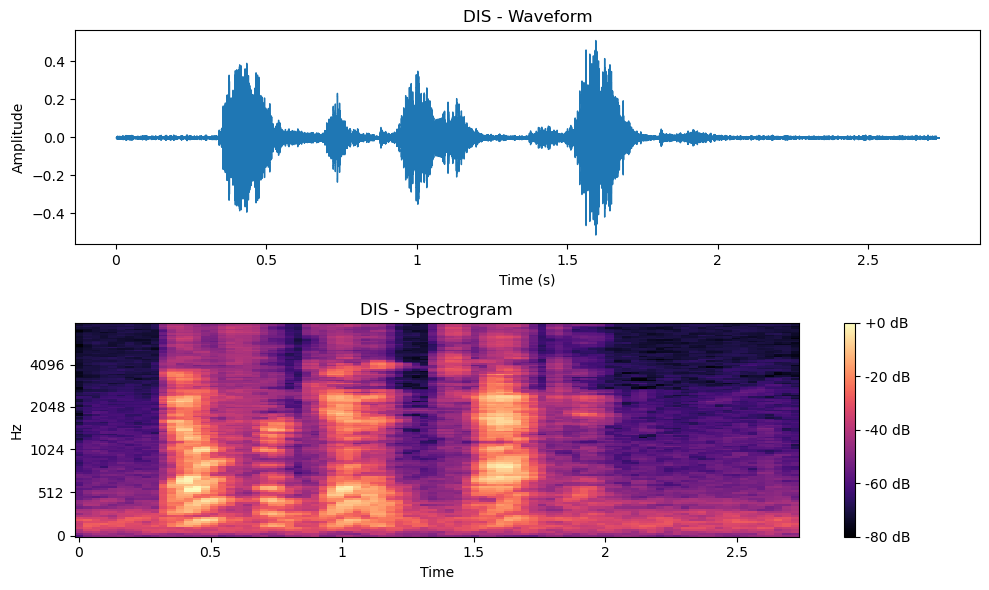

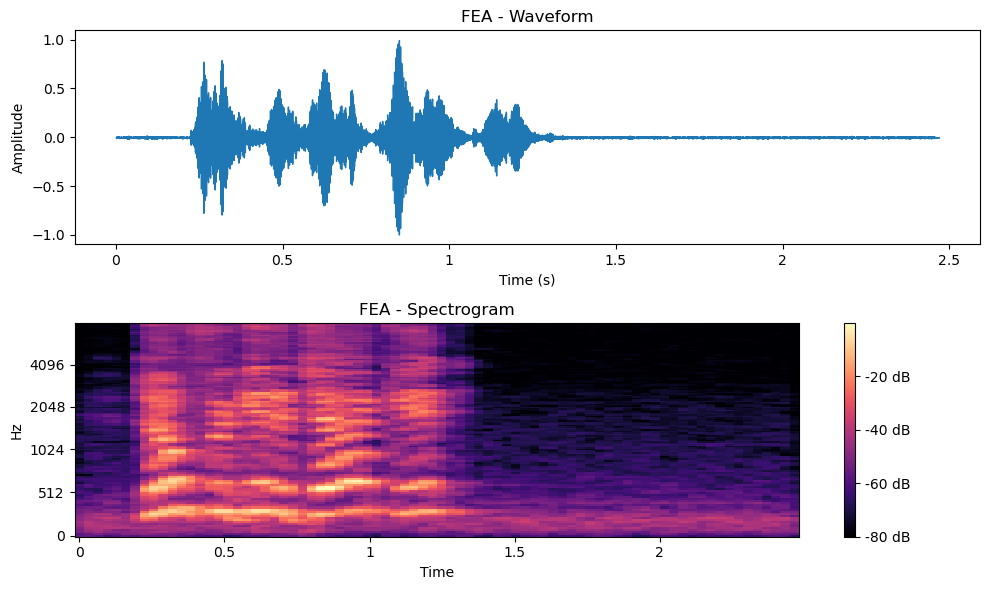

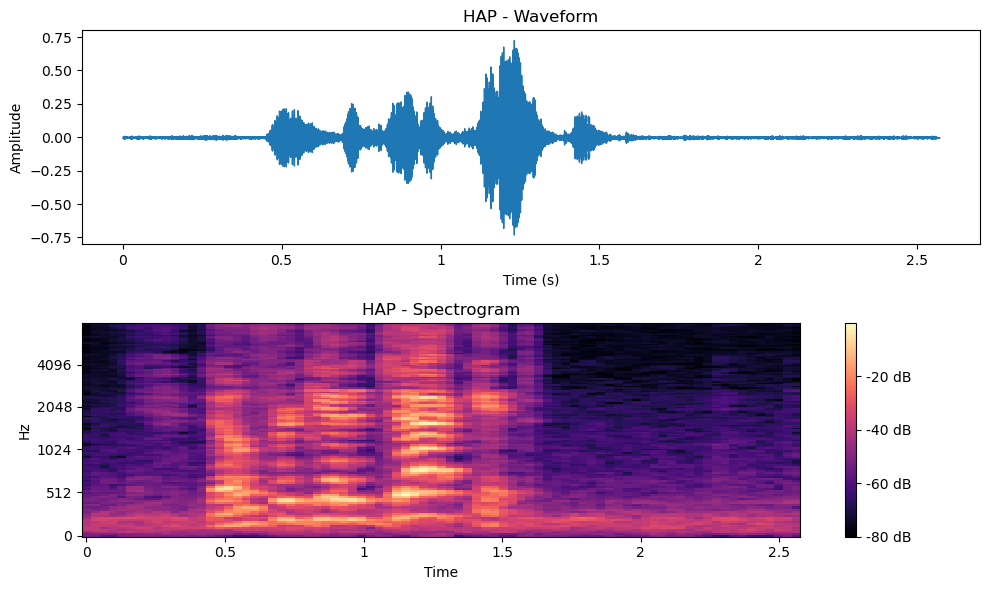

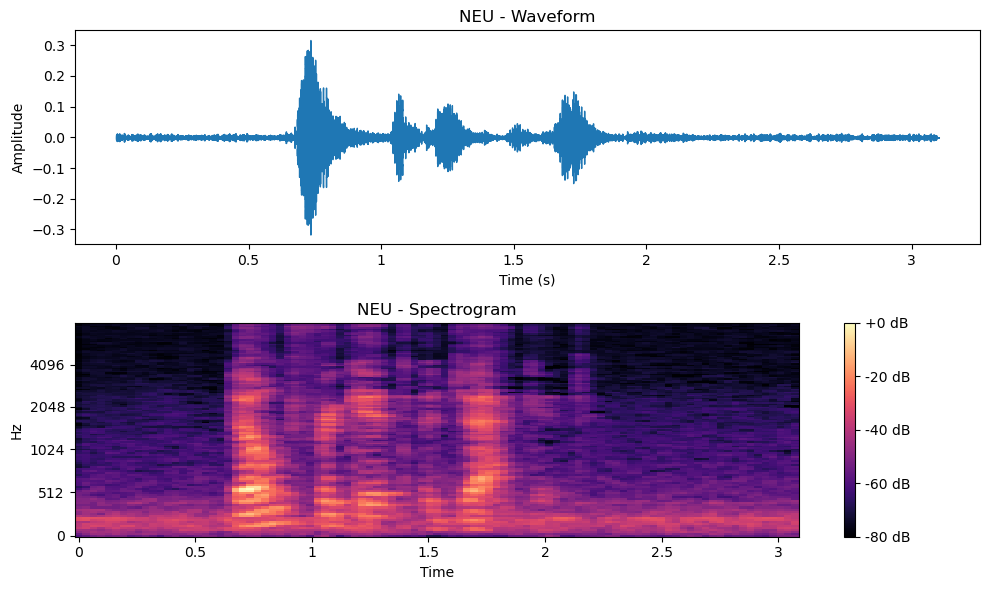

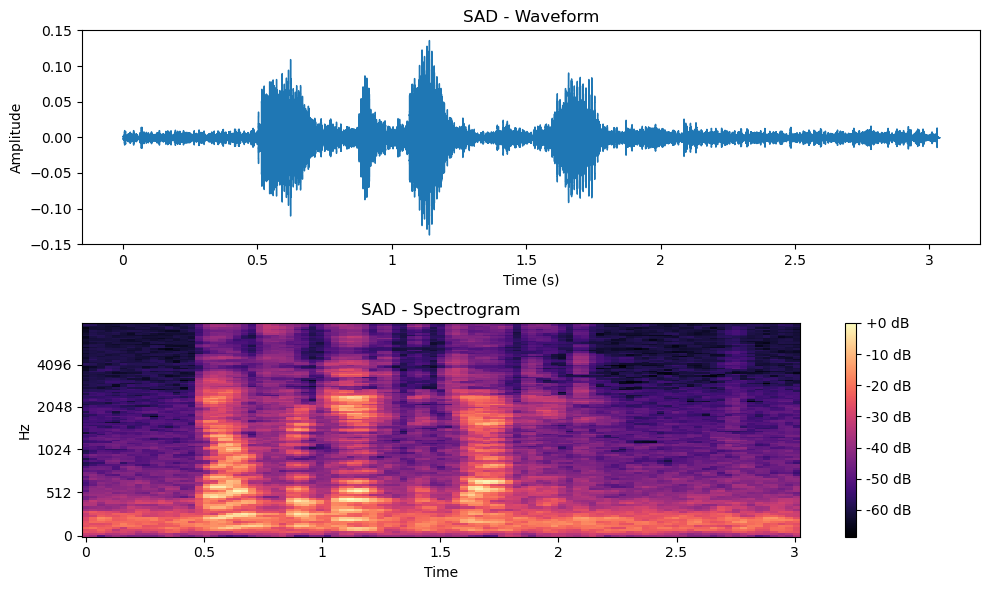

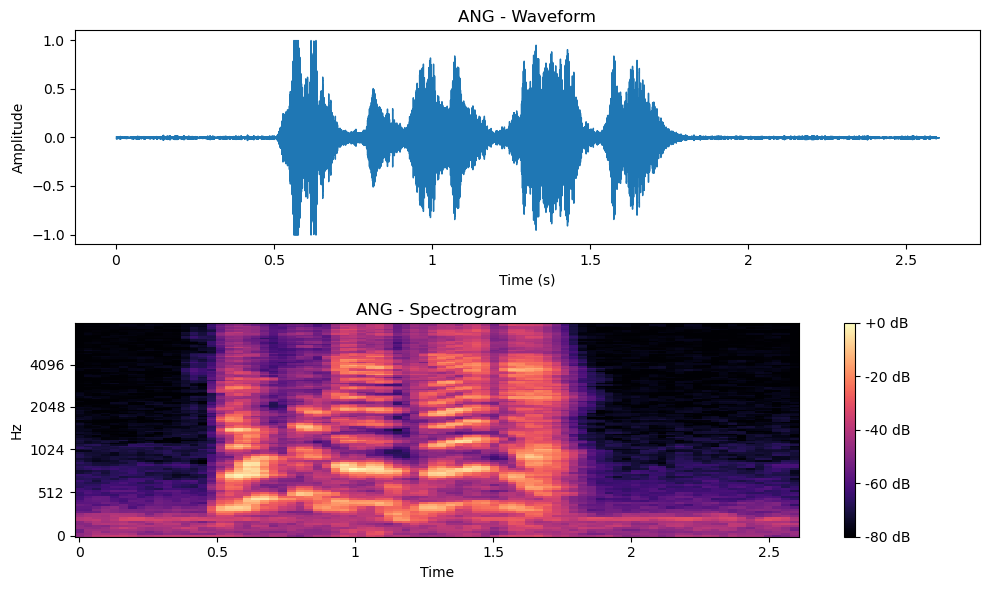

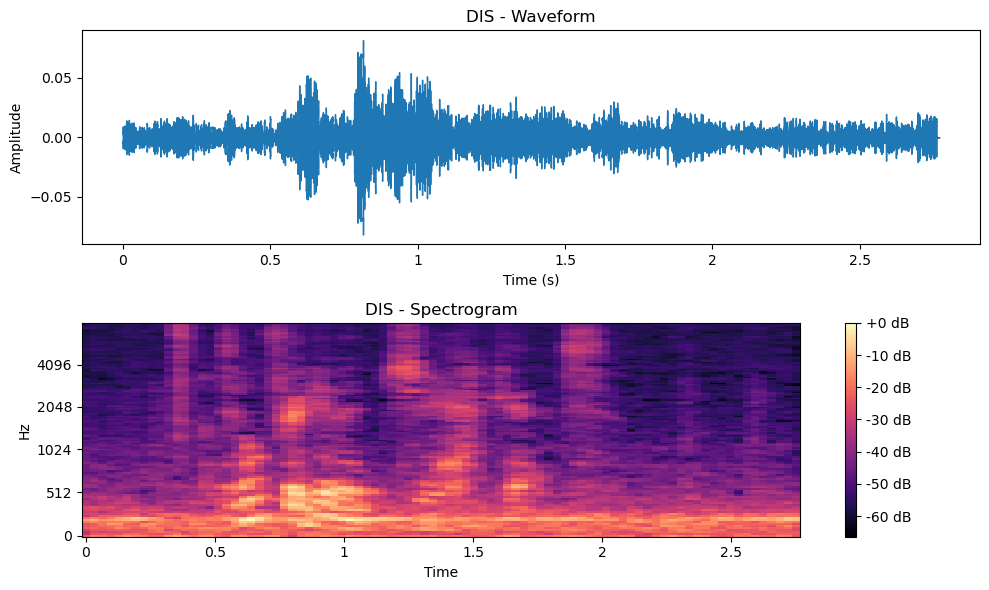

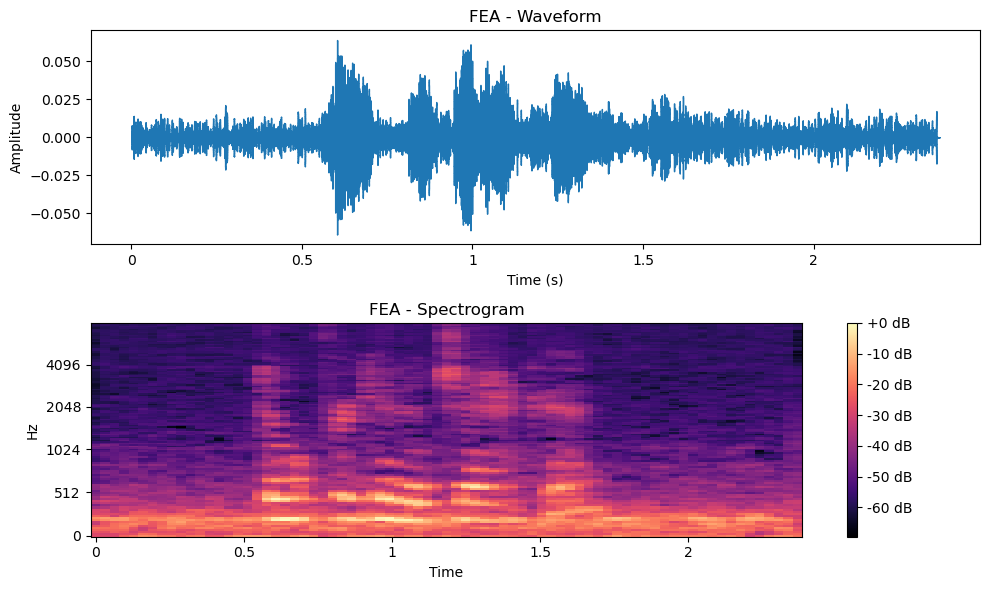

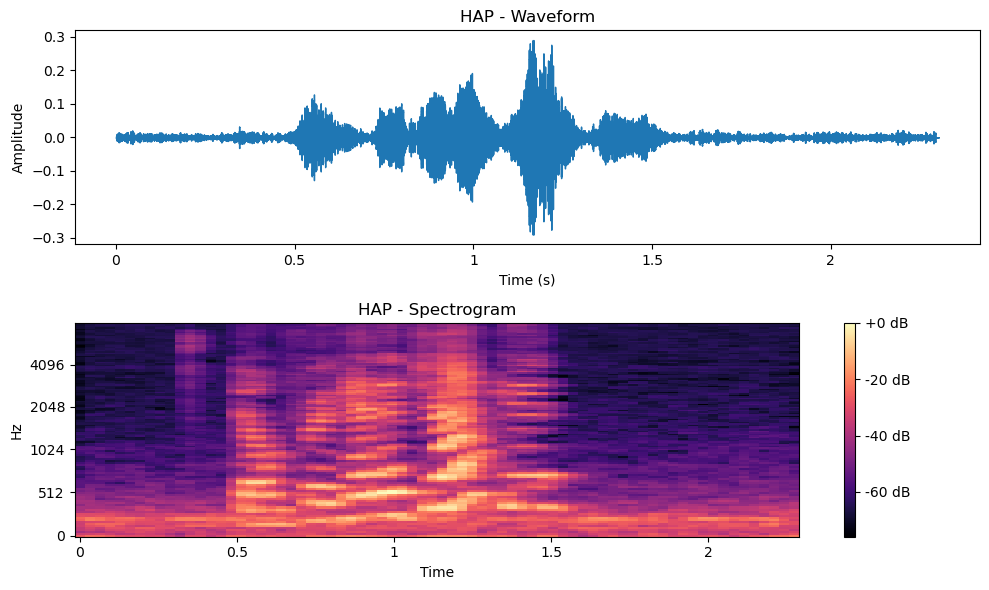

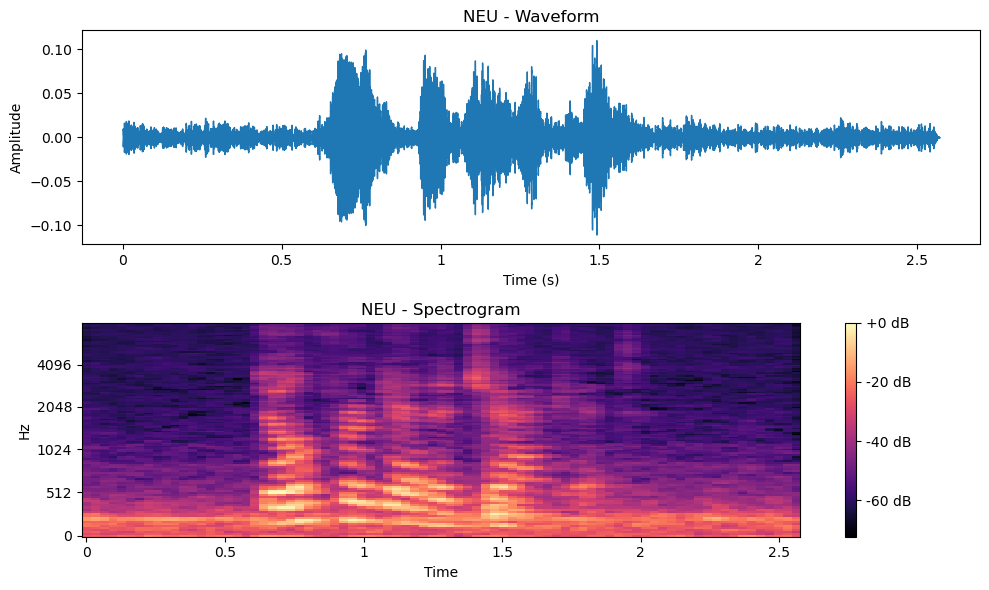

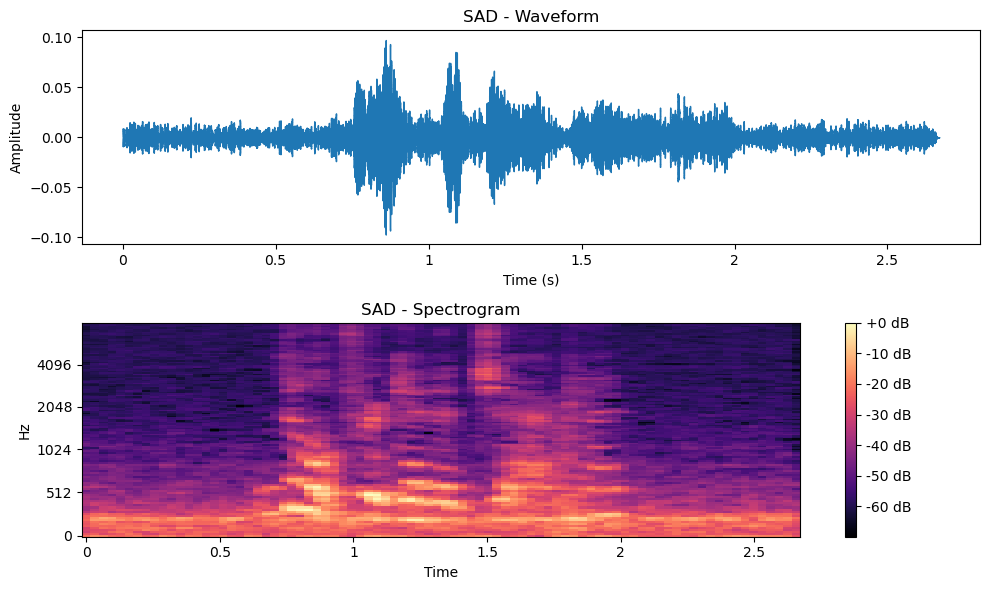

In [11]:
# Set the path to your AudioSubset folder
audio_folder = 'AudioSubset'

# Define a function to extract emotion labels from file names
def get_emotion_from_filename(filename):
    parts = filename.split('_')
    if len(parts) > 2:
        return parts[2]  
    return 'Unknown'

# List all .wav files in the folder
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

# Plot waveform and spectrogram for each file
for file_name in audio_files:
    file_path = os.path.join(audio_folder, file_name)
    emotion = get_emotion_from_filename(file_name)  # Extract the emotion label
    
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Plot waveform
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.title(f"{emotion} - Waveform")
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    
    # Plot spectrogram
    plt.subplot(2, 1, 2)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"{emotion} - Spectrogram")
    
    plt.tight_layout()
    plt.show()


In [13]:
# Set the path to your AudioSubset folder
audio_folder = 'AudioSubset'

# List all .wav files in the folder
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

# Loop through each file and create an audio playback button
for file_name in audio_files:
    file_path = os.path.join(audio_folder, file_name)
    emotion = file_name.split('_')[2]  # Extract emotion from filename
    
    # Display emotion label and audio playback button
    print(f"Emotion: {emotion}")
    display(Audio(filename=file_path))

Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


In [15]:
# List all .wav files in the folder
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

# Filter and display only "Anger" audio files
print("Sad Emotion Samples:")
for file_name in audio_files:
    if "SAD" in file_name.split('_'):  # Check if the third part is 'ANG' for Anger
        file_path = os.path.join(audio_folder, file_name)
        display(Audio(filename=file_path))

Sad Emotion Samples:


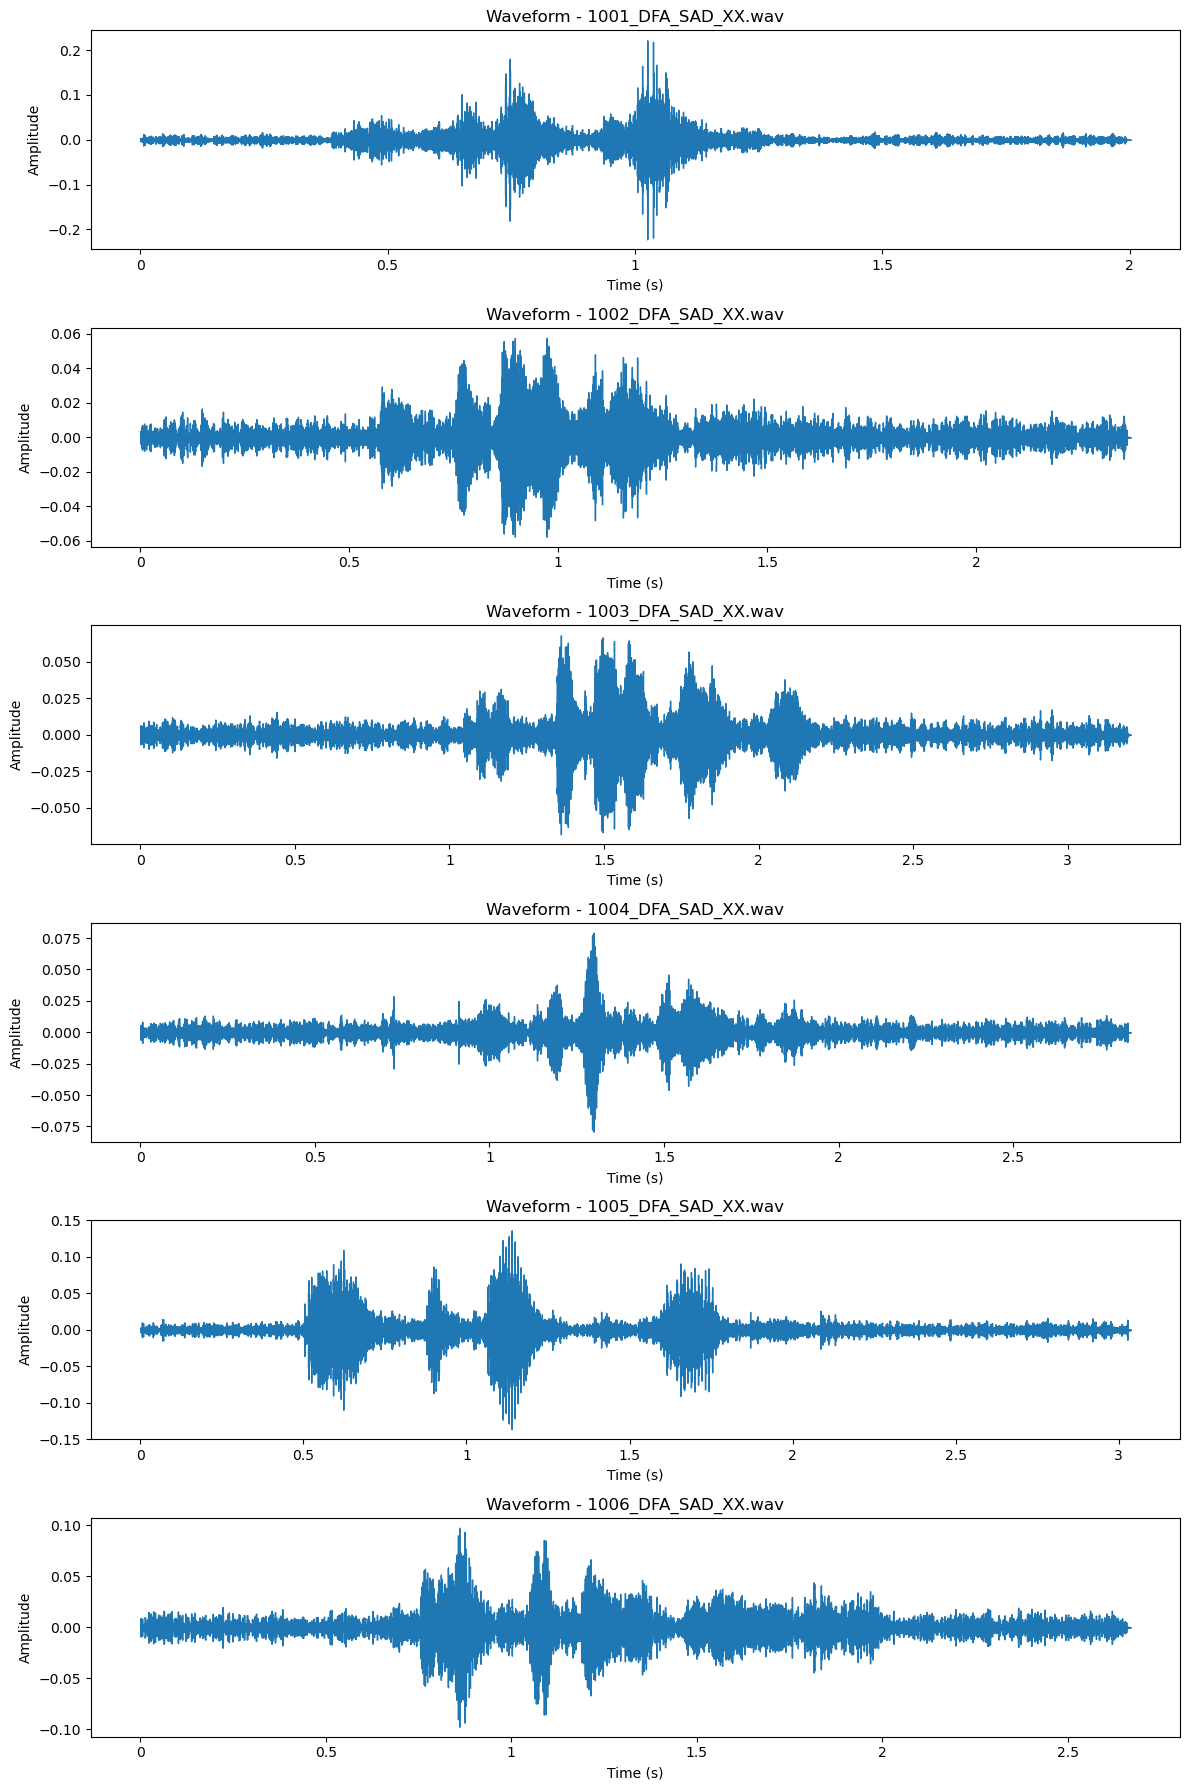

In [17]:
# List all .wav files in the folder and filter for "Sad" files
sad_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav') and 'SAD' in f.split('_')]

# Initialize the plot with the exact number of rows needed
plt.figure(figsize=(12, len(sad_files) * 3))

# Plot each "Sad" file waveform
for idx, file_name in enumerate(sad_files):
    file_path = os.path.join(audio_folder, file_name)
    
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Plot waveform
    plt.subplot(len(sad_files), 1, idx + 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {file_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()